In [1]:
import numpy as np
import pandas as pd

In [2]:
df_eval = pd.read_csv("data/petitions/cls_result/2/eval_result_details.csv", index_col=0)

In [3]:
df_eval.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,pred,actual
0,0.006194,0.002298,0.000237,0.006501,0.075494,0.001176,0.157474,0.006818,0.157159,0.035241,0.058174,0.187584,0.005805,0.007686,0.236395,0.055763,14.0,4.0
1,0.016452,0.002567,0.000542,0.002745,0.017979,0.000429,0.002376,0.008506,0.004374,0.524851,0.000595,0.002256,0.008454,0.000746,0.402238,0.004889,9.0,14.0
2,0.083312,0.009340,0.000388,0.001735,0.020642,0.000681,0.010486,0.004875,0.046895,0.000228,0.001285,0.084376,0.010527,0.000301,0.049838,0.675091,15.0,15.0
3,0.000749,0.004248,0.001611,0.011987,0.020988,0.005258,0.004140,0.000599,0.041353,0.298556,0.004290,0.560658,0.000222,0.001984,0.024753,0.018606,11.0,11.0
4,0.020001,0.245898,0.000811,0.005689,0.010565,0.000319,0.042560,0.003825,0.047524,0.000873,0.004271,0.011425,0.005891,0.001969,0.027492,0.570888,15.0,15.0


In [4]:
df_fail = df_eval.loc[df_eval['pred'] != df_eval['actual']] 

In [5]:
df_fail.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,pred,actual
0,0.006194,0.002298,0.000237,0.006501,0.075494,0.001176,0.157474,0.006818,0.157159,0.035241,0.058174,0.187584,0.005805,0.007686,0.236395,0.055763,14.0,4.0
1,0.016452,0.002567,0.000542,0.002745,0.017979,0.000429,0.002376,0.008506,0.004374,0.524851,0.000595,0.002256,0.008454,0.000746,0.402238,0.004889,9.0,14.0
5,0.005322,0.000403,0.000722,0.900517,0.018643,0.001300,0.000329,0.005093,0.001559,0.007479,0.000906,0.007525,0.001995,0.000299,0.041536,0.006370,3.0,4.0
12,0.363068,0.001587,0.000243,0.000673,0.193357,0.000162,0.001253,0.141417,0.001039,0.000841,0.000229,0.003090,0.015423,0.000466,0.214347,0.062805,0.0,14.0
18,0.001741,0.000521,0.000213,0.006790,0.018635,0.003733,0.047904,0.001601,0.012533,0.001081,0.426795,0.433371,0.004637,0.003895,0.030360,0.006190,11.0,10.0


In [6]:
#'경제민주화' : '0', 
#'교통/건축/국토' : '1', 
#'농산어촌' : '2',
#'문화/예술/체육/언론' : '3',
#'미래' : '4',
#'반려동물' : '5',
#'보건복지' : '6',
#'성장동력' : '7',
#'안전/환경' : '8',
#'외교/통일/국방' : '9',
#'육아/교육' : '10',
#'인권/성평등' : '11',
#'일자리' : '12',
#'저출산/고령화대책' : '13',
#'정치개혁' : '14',
#'행정' : '15',

In [7]:
df_fail.groupby('actual')['actual'].count()

actual
0.0     285
1.0     188
2.0      26
3.0     173
4.0     461
5.0      25
6.0     225
7.0     194
8.0     299
9.0     189
10.0    152
11.0    472
12.0    183
13.0     71
14.0    539
15.0    471
Name: actual, dtype: int64

In [8]:
df_fail.groupby('actual')['actual'].count() / len(df_fail)

actual
0.0     0.072097
1.0     0.047559
2.0     0.006577
3.0     0.043764
4.0     0.116620
5.0     0.006324
6.0     0.056919
7.0     0.049077
8.0     0.075639
9.0     0.047812
10.0    0.038452
11.0    0.119403
12.0    0.046294
13.0    0.017961
14.0    0.136352
15.0    0.119150
Name: actual, dtype: float64

In [9]:
len(df_fail)

3953

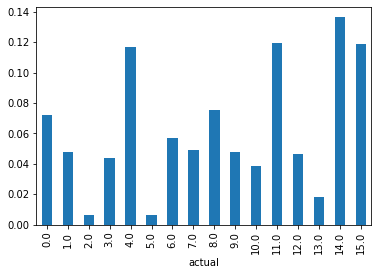

In [11]:
(df_fail.groupby('actual')['actual'].count() / len(df_fail)).plot.bar(x='actual', y='val')

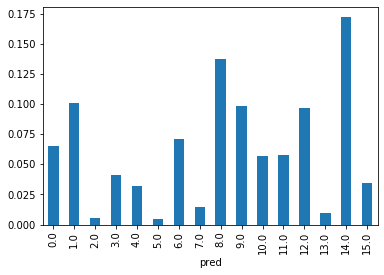

In [12]:
(df_fail.groupby('pred')['pred'].count() / len(df_fail)).plot.bar(x='pred', y='val')

In [13]:
df_dev = pd.read_csv("data/petitions/cls_result/2/dev.tsv", names=['doc_idx', 'contents', 'category_label'], sep='\t', header=0)

In [14]:
df_dev.head(5)

,doc_idx,contents,category_label
0,290708,대한민국이 어떻게 이렇게 망가질 수 있는지요? 청소년에게 자유? 차라리 흡연괸 음주...,4
1,112223,국익에 도움되는 정책들을 무조건 반대만하는 자한당은 보통 일본 사람들보다 더 한국에...,14
2,25472,은행송금시 오송금 할경우 은행에서 송금받은 고객에게 연락을 취하여 상황통보하고 상대...,15
3,96652,오늘 또 한 분의 일본군위안부정신대 피해자 할머니가 돌아가셨습니다. 단 28명만이 ...,11
4,27835,제목그대로 원룸관리비에 대한 규정을 확실하게 만들어주셨으면 좋겠습니다. 예를들어 전...,15


In [16]:
df_eval.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,pred,actual
0,0.006194,0.002298,0.000237,0.006501,0.075494,0.001176,0.157474,0.006818,0.157159,0.035241,0.058174,0.187584,0.005805,0.007686,0.236395,0.055763,14.0,4.0
1,0.016452,0.002567,0.000542,0.002745,0.017979,0.000429,0.002376,0.008506,0.004374,0.524851,0.000595,0.002256,0.008454,0.000746,0.402238,0.004889,9.0,14.0
2,0.083312,0.009340,0.000388,0.001735,0.020642,0.000681,0.010486,0.004875,0.046895,0.000228,0.001285,0.084376,0.010527,0.000301,0.049838,0.675091,15.0,15.0
3,0.000749,0.004248,0.001611,0.011987,0.020988,0.005258,0.004140,0.000599,0.041353,0.298556,0.004290,0.560658,0.000222,0.001984,0.024753,0.018606,11.0,11.0
4,0.020001,0.245898,0.000811,0.005689,0.010565,0.000319,0.042560,0.003825,0.047524,0.000873,0.004271,0.011425,0.005891,0.001969,0.027492,0.570888,15.0,15.0


In [18]:
df_dev.loc[(df_eval['pred'] != df_eval['actual']) & (df_eval['pred'] == 15.0)]

,doc_idx,contents,category_label
211,2792,석유에너지의 안정적경제적 수송을 위해 송유관공사에서는 전국 주요도시와 공항 비축기지...,1
299,26376,안녕하십니까.구lig자동차외제차 대물보상경력수입차렉서스포드폭스바겐보험 어드바이져 로...,1
342,145484,현재 우리나라 제도상 변호사는 로스쿨 졸업 후 12차 시험만 통과하면 바로 변호사 ...,12
350,153555,문제인태통령님저는수없이도둑질은하고 얌전히살고있습니다누범및 수형인명분5년이지나면삭제하...,11
490,291945,공무원분들에게 건의하면 타 부처부서와 공유 않고 자기 선에서 해결하려니 잘 안됩니다...,7
...,...,...,...
9802,145782,경찰이 지금도 얼마나 비리를 저질러도 자기들끼리 숨기느라 적발도 어려운데 어떻게 경...,8
9848,194148,조영남 사건처럼 관행이라서 합법이 된 내용 등의 목록을 대법원 홈페이지에 게시해서 ...,4
9854,142007,저는 업무 특성상 자주 시청이나 구청 군청 민원실을 방문합니다ᆢ 가는 여러 곳 시청...,6
9859,283973,고발사건2018형제39857 건조물침입 처분일 2018.8.20. 처리하면서처리를 ...,11


In [19]:
df_train = pd.read_csv("data/petitions/cls_result/2/train.tsv", names=['doc_idx', 'contents', 'category_label'], sep='\t', header=0)

In [20]:
df_train.head(5)

,doc_idx,contents,category_label
0,241119,아직도 장애인도우미견의 출입을 거부하는 매장 음식점이 너무 많습니다 현행 법이 제대...,11
1,222507,LG display파주구미 회사내 특히 건물 밖이 아닌 건물내에서는 특정 통신사LG...,8
2,122478,특정 인물 사형 청원 비하발언 등 부적절한 내용의 청원이 올라오고 있습니다. 청원은...,15
3,212103,그것이 알고 싶다를 보니 너무 두렵고 걱정이 많이 됩니다 불법 몰카로 인해 피해자가...,11
4,114620,뉴스를 통해 간헐적으로 올라오고있는 한국 교수진들의 대학원생을 향한 갑질에 대한 강...,11


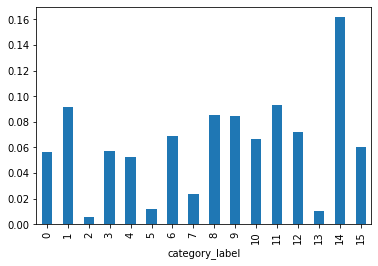

In [21]:
(df_train.groupby('category_label')['category_label'].count() / len(df_train)).plot.bar(x='category_label', y='val')

In [22]:
s1 = (df_train.groupby('category_label')['category_label'].count() / len(df_train))
s2 = (df_dev.groupby('category_label')['category_label'].count() / len(df_dev))
s3 = (df_fail.groupby('actual')['actual'].count() / len(df_fail))
frame = { 'train': s1, 'dev': s2, 'falt': s3 } 
result = pd.DataFrame(frame) 

In [23]:
result

,train,dev,falt
0.0,0.05643,0.0551,0.072097
1.0,0.09114,0.0892,0.047559
2.0,0.00560,0.0063,0.006577
3.0,0.05713,0.0608,0.043764
4.0,0.05251,0.0526,0.116620
5.0,0.01165,0.0121,0.006324
6.0,0.06912,0.0733,0.056919
7.0,0.02332,0.0231,0.049077
8.0,0.08547,0.0859,0.075639
9.0,0.08414,0.0817,0.047812


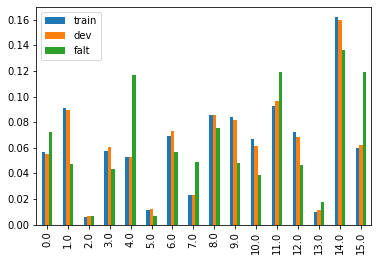

In [24]:
result.plot.bar()

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(df_eval['actual'], df_eval['pred'])

array([[ 266,   54,    0,    3,   30,    0,   19,   15,    5,    4,    3,
           4,   62,    0,   68,   18],
       [  19,  704,    5,    3,    2,    0,   10,    3,   79,    7,    2,
           7,   17,    1,   21,   12],
       [   2,    5,   37,    1,    2,    2,    3,    0,    3,    2,    0,
           2,    1,    0,    2,    1],
       [   2,    5,    1,  435,    6,    0,    1,    3,   13,   55,   14,
          21,    6,    0,   43,    3],
       [  50,   39,    2,   32,   65,    0,   27,   14,   44,   46,   20,
          23,   48,    1,  108,    7],
       [   0,    1,    0,    1,    1,   96,    2,    0,    6,    0,    4,
           2,    0,    0,    8,    0],
       [  11,   17,    2,    1,    8,    2,  508,    1,   64,   10,   28,
          11,   30,    8,   16,   16],
       [  46,    8,    1,    6,   23,    0,    3,   37,   13,    4,    4,
           1,   45,    3,   33,    4],
       [   3,   75,    0,    8,    3,    4,   37,    2,  560,   28,   25,
          38,   19,   

In [27]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(df_eval['actual'], df_eval['pred'], target_names=['경제민주화', 
'교통/건축/국토', 
'농산어촌',
'문화/예술/체육/언론',
'미래',
'반려동물',
'보건복지',
'성장동력',
'안전/환경',
'외교/통일/국방',
'육아/교육',
'인권/성평등',
'일자리',
'저출산/고령화대책',
'정치개혁',
'행정']))

              precision    recall  f1-score   support

       경제민주화       0.51      0.48      0.49       551
    교통/건축/국토       0.64      0.79      0.71       892
        농산어촌       0.63      0.59      0.61        63
 문화/예술/체육/언론       0.73      0.72      0.72       608
          미래       0.34      0.12      0.18       526
        반려동물       0.85      0.79      0.82       121
        보건복지       0.64      0.69      0.67       733
        성장동력       0.39      0.16      0.23       231
       안전/환경       0.51      0.65      0.57       859
    외교/통일/국방       0.62      0.77      0.68       817
       육아/교육       0.67      0.75      0.71       613
      인권/성평등       0.68      0.51      0.59       968
         일자리       0.57      0.73      0.64       685
   저출산/고령화대책       0.53      0.37      0.43       112
        정치개혁       0.61      0.66      0.63      1596
          행정       0.53      0.25      0.34       625

    accuracy                           0.60     10000
   macro avg       0.59   

In [31]:
df_train.groupby('category_label')['category_label'].count()

category_label
0      5643
1      9114
2       560
3      5713
4      5251
5      1165
6      6912
7      2332
8      8547
9      8414
10     6650
11     9292
12     7213
13     1019
14    16180
15     5995
Name: category_label, dtype: int64

In [36]:
(df_fail.loc[df_fail['actual'] == 4.0]).groupby('pred')['pred'].count()

pred
0.0      50
1.0      39
2.0       2
3.0      32
6.0      27
7.0      14
8.0      44
9.0      46
10.0     20
11.0     23
12.0     48
13.0      1
14.0    108
15.0      7
Name: pred, dtype: int64

In [35]:
df_fail.loc[df_fail['actual'] == 4.0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,pred,actual
0,0.006194,0.002298,0.000237,0.006501,0.075494,0.001176,0.157474,0.006818,0.157159,0.035241,0.058174,0.187584,0.005805,0.007686,0.236395,0.055763,14.0,4.0
5,0.005322,0.000403,0.000722,0.900517,0.018643,0.001300,0.000329,0.005093,0.001559,0.007479,0.000906,0.007525,0.001995,0.000299,0.041536,0.006370,3.0,4.0
37,0.427058,0.000926,0.000720,0.004058,0.073123,0.000701,0.000432,0.035594,0.002246,0.001609,0.000223,0.014273,0.003003,0.000345,0.408660,0.027030,0.0,4.0
66,0.002685,0.002658,0.000427,0.003553,0.156412,0.001309,0.005660,0.014179,0.012144,0.003276,0.646014,0.006828,0.007275,0.010331,0.125113,0.002137,10.0,4.0
73,0.317083,0.000514,0.000868,0.001709,0.227258,0.000429,0.000657,0.304180,0.001221,0.006071,0.000383,0.001444,0.007212,0.000572,0.106485,0.023915,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,0.209516,0.000879,0.000456,0.002701,0.249345,0.000472,0.001659,0.145344,0.001399,0.001627,0.001061,0.006083,0.018000,0.000813,0.329503,0.031144,14.0,4.0
9939,0.035879,0.001913,0.001853,0.000432,0.038493,0.000434,0.000658,0.316707,0.001538,0.000768,0.001186,0.000320,0.584303,0.001905,0.010105,0.003507,12.0,4.0
9958,0.030285,0.001832,0.000291,0.000272,0.046034,0.000188,0.783160,0.003810,0.003632,0.001229,0.001395,0.002460,0.001851,0.005047,0.081844,0.036668,6.0,4.0
9966,0.018868,0.015103,0.016234,0.006978,0.124269,0.001285,0.034368,0.032553,0.017628,0.544999,0.001004,0.014723,0.004117,0.001386,0.099849,0.066635,9.0,4.0
